# Group Analysis
Here we will try to investigate correlations between input variables and the target variable `LoadFactor` for different groupings of the data e.g. does grouping by `Airline` show stronger correlations with our target variable.

In [2]:
import os
import numpy as np
import pandas as pd
import datetime as dt
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data

In [146]:
data_path = os.path.join('..', 'src', 'data', 'raw', 'data.xlsx')
data = pd.read_excel(data_path)
data['Year'] = data['ScheduleTime'].dt.year
data['Month'] = data['ScheduleTime'].dt.month
data['Week'] = data['ScheduleTime'].dt.isocalendar().week
data['Year'] = data.apply(lambda row: row['Year']-1 if row['Month'] == 1 and row['Week'] > 50 else row['Year'], axis=1)
data.shape

(36770, 12)

In [147]:
data.columns

Index(['ScheduleTime', 'Airline', 'FlightNumber', 'Destination',
       'AircraftType', 'FlightType', 'Sector', 'SeatCapacity', 'LoadFactor',
       'Year', 'Month', 'Week'],
      dtype='object')

In [148]:
loadfactor_mean_count = data.groupby([ data.ScheduleTime.dt.date])['LoadFactor'].agg(['count', 'mean']).reset_index()

In [149]:
loadfactor_mean_count

,ScheduleTime,count,mean
0,2021-01-01,25,0.207896
1,2021-01-02,47,0.335468
2,2021-01-03,72,0.331191
3,2021-01-04,60,0.286898
4,2021-01-05,35,0.248770
...,...,...,...
399,2022-02-04,141,0.532948
400,2022-02-05,103,0.522045
401,2022-02-06,144,0.546368
402,2022-02-07,130,0.499743


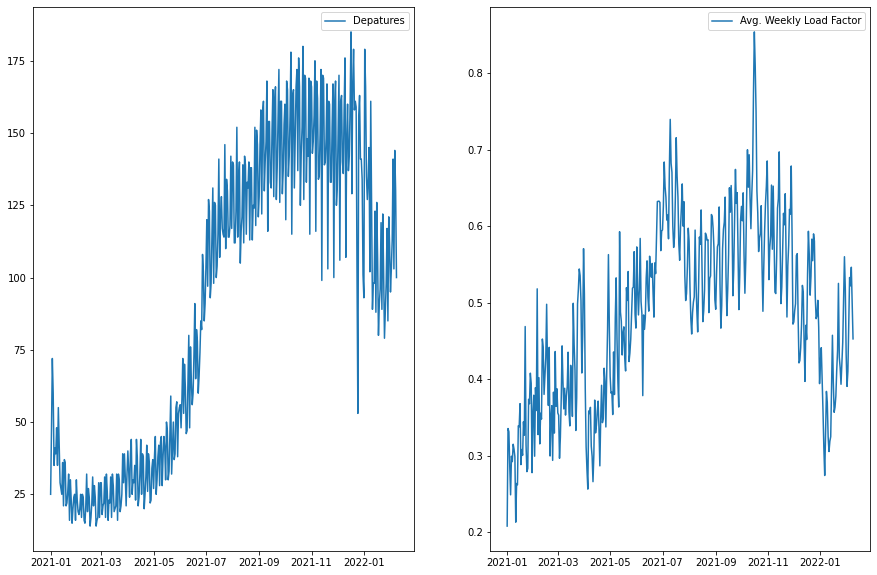

In [150]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].plot(loadfactor_mean_count['ScheduleTime'], loadfactor_mean_count['count'], label='Depatures')
ax[0].legend()
ax[1].plot(loadfactor_mean_count['ScheduleTime'], loadfactor_mean_count['mean'], label='Avg. Weekly Load Factor')
ax[1].legend()
plt.show()

## By Sector

In [160]:
level = 'Week'
date_year_week = data.set_index(['Year', level])['ScheduleTime'].dt.date

In [161]:
sector_df = data.groupby(['Year', level, 'Sector'])['LoadFactor'].agg(['count', 'mean']).reset_index()
sector_df = sector_df.join(date_year_week, on=['Year', level], how='left')
sector_df.sort_values(by='ScheduleTime')
sector_df

,Year,Week,Sector,count,mean,ScheduleTime
0,2020,53,AE,2,0.280374,2021-01-01
0,2020,53,AE,2,0.280374,2021-01-01
0,2020,53,AE,2,0.280374,2021-01-01
0,2020,53,AE,2,0.280374,2021-01-01
0,2020,53,AE,2,0.280374,2021-01-01
...,...,...,...,...,...,...
485,2022,6,US,97,0.488331,2022-02-08
485,2022,6,US,97,0.488331,2022-02-08
485,2022,6,US,97,0.488331,2022-02-08
485,2022,6,US,97,0.488331,2022-02-08


In [162]:
sectors = list(set(sector_df['Sector']))
len(sectors)

12

100%|██████████| 12/12 [00:01<00:00,  9.77it/s]


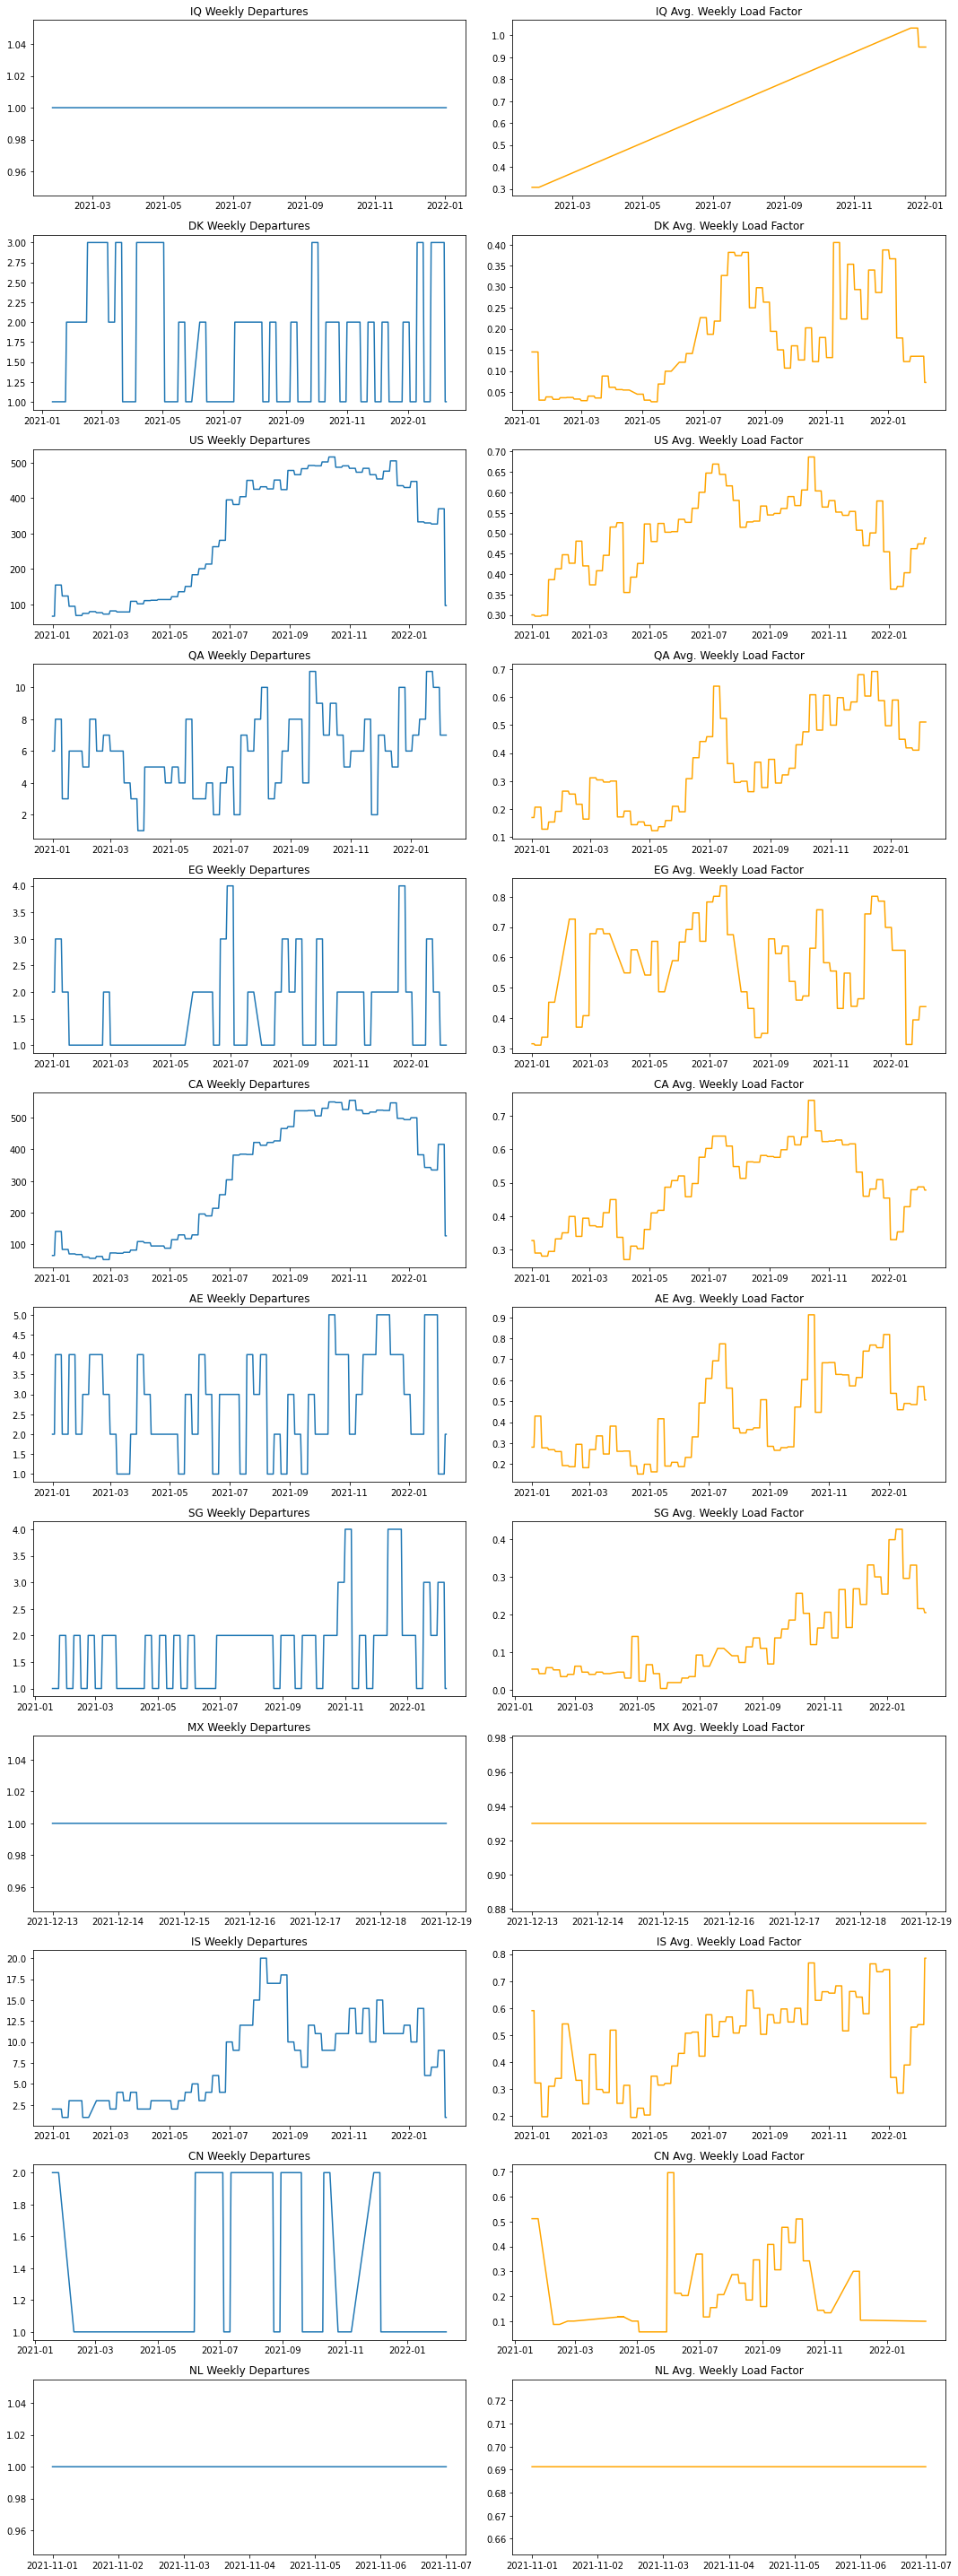

In [163]:
r = 12
c = 2
fig, ax = plt.subplots(r, c, figsize=(15,40))

index = 0
for row in tqdm(range(r)):
    sector = sectors[index]
    df = sector_df[sector_df['Sector'] == sector]

    ax[row,0].set_title(f'{sector} {level}ly Departures')
    ax[row,0].plot(df['ScheduleTime'], df['count'])
    ax[row,1].set_title(f'{sector} Avg. {level}ly Load Factor')
    ax[row,1].plot(df['ScheduleTime'], df['mean'], c='orange')
    index +=1

plt.tight_layout()
plt.show()

 67%|██████▋   | 8/12 [00:00<00:00,  8.53it/s]/opt/homebrew/Caskroom/miniconda/base/envs/airport_forecasting/lib/python3.8/site-packages/seaborn/matrix.py:198: RuntimeWarning:

All-NaN slice encountered

/opt/homebrew/Caskroom/miniconda/base/envs/airport_forecasting/lib/python3.8/site-packages/seaborn/matrix.py:203: RuntimeWarning:

All-NaN slice encountered

 92%|█████████▏| 11/12 [00:01<00:00,  8.11it/s]/opt/homebrew/Caskroom/miniconda/base/envs/airport_forecasting/lib/python3.8/site-packages/seaborn/matrix.py:198: RuntimeWarning:

All-NaN slice encountered

/opt/homebrew/Caskroom/miniconda/base/envs/airport_forecasting/lib/python3.8/site-packages/seaborn/matrix.py:203: RuntimeWarning:

All-NaN slice encountered

100%|██████████| 12/12 [00:01<00:00,  8.10it/s]


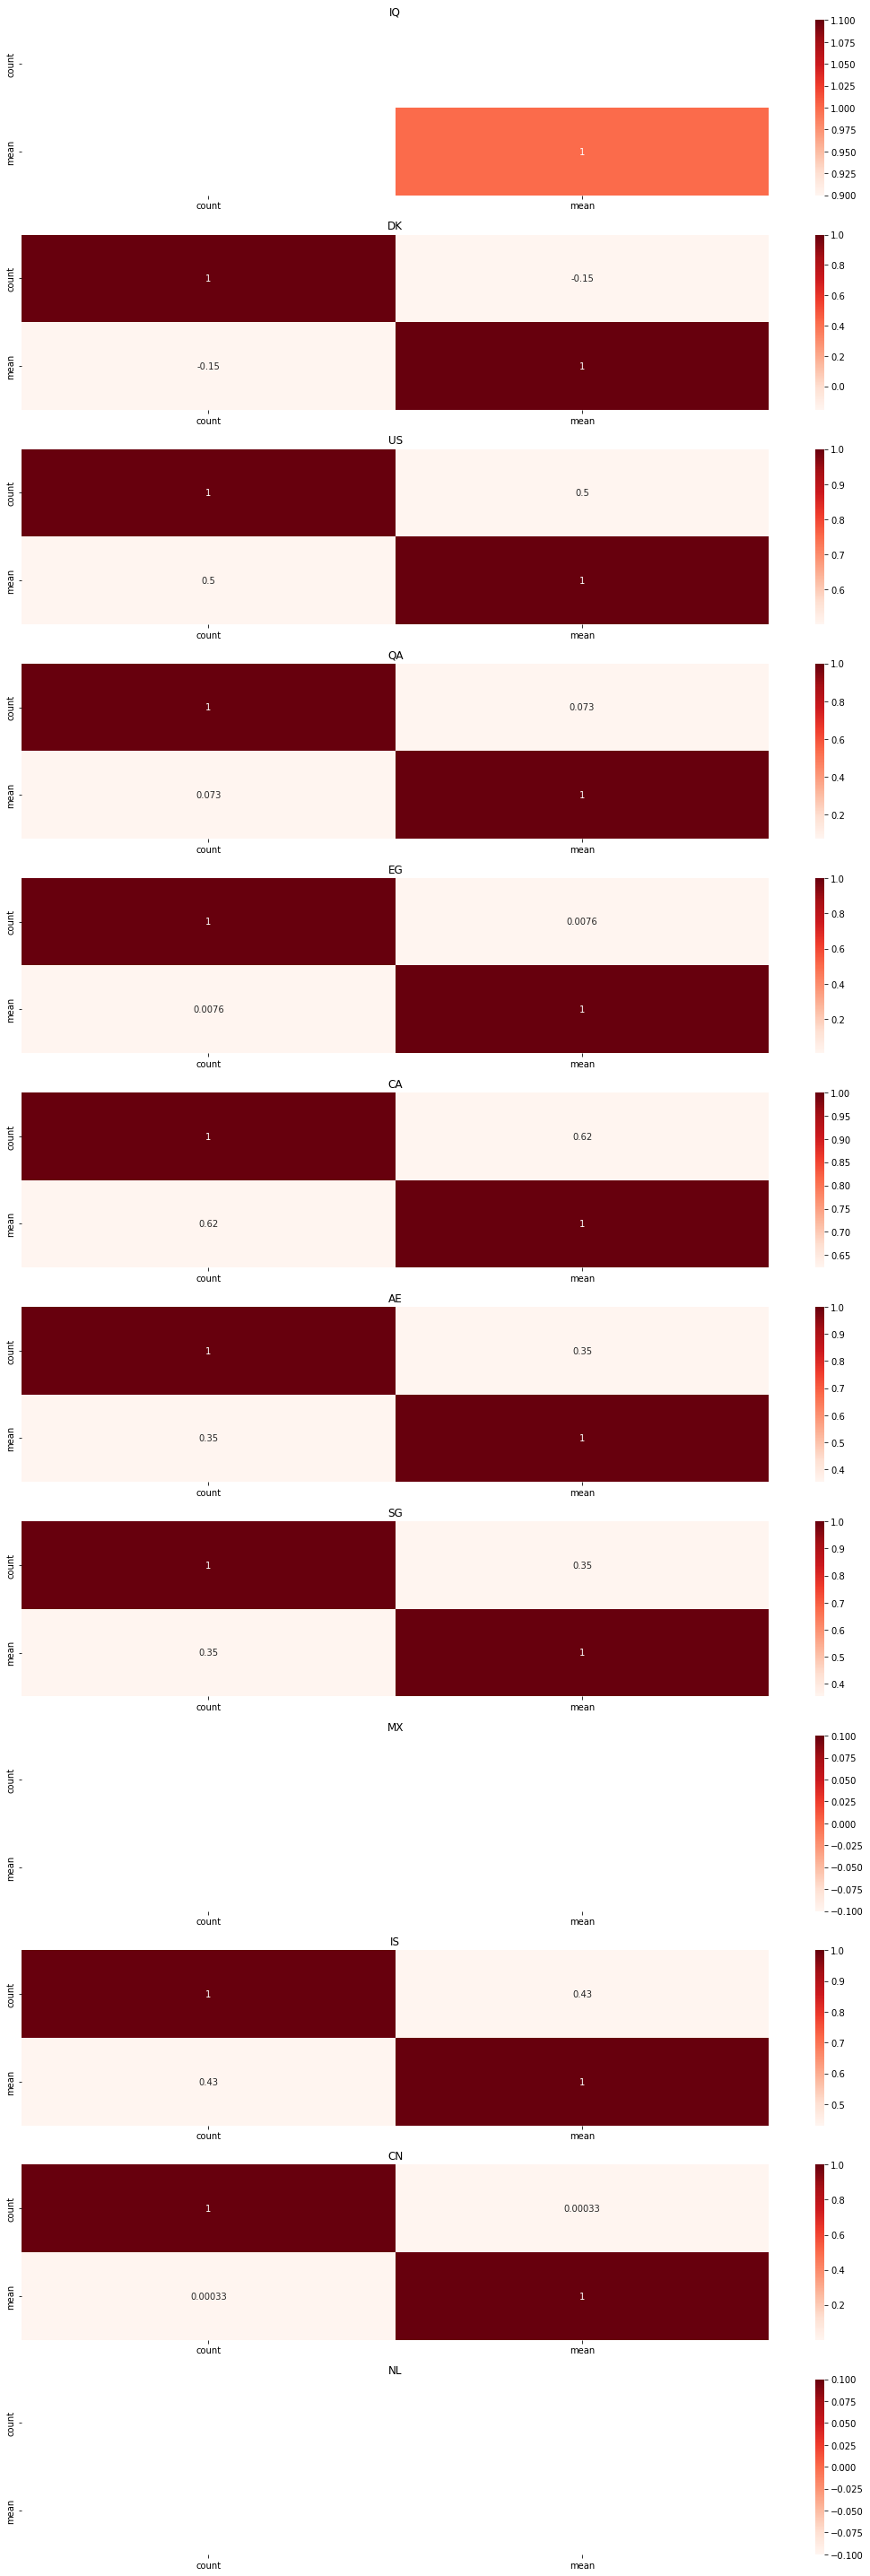

In [168]:
import seaborn as sns

r = 12
c = 1 
fig, ax = plt.subplots(r, c, figsize=(15,40))

index = 0
for row in tqdm(range(r)):
    sector = sectors[index]
    df = sector_df[sector_df['Sector'] == sector]
    ax[row].set_title(f'{sector}')
    #Using Pearson Correlation
    cor = df[['count', 'mean']].corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, ax=ax[row])

    index +=1

plt.tight_layout()
plt.show()

